In [41]:
import pennylane as qml
from pennylane import numpy as np
from matplotlib import pyplot as plt 

In [23]:
#I.10.1
dev = qml.device('default.qubit', wires=1)

@qml.qnode(dev)
def circuit():
    qml.RX(np.pi / 4, wires=0)
    qml.Hadamard(wires=0)
    qml.PauliZ(wires=0)

    return qml.expval(qml.PauliY(0))

print(circuit())

-0.7071067811865471


In [14]:
#I.10.2

# An array to store your results
shot_results = [0,0,0,0,0]

# Different numbers of shots
shot_values = [100, 1000, 10000, 100000, 1000000]
j = 0

for i in shot_values: 
    
    dev = qml.device('default.qubit', wires = 1, shots = i)
    
    @qml.qnode(dev)
    def device():
        qml.RX(np.pi / 4, wires=0)
        qml.Hadamard(wires=0)
        qml.PauliZ(wires=0)

        return qml.expval(qml.PauliY(wires=0))
    
    shot_results[j] = device()
    j+=1

print(qml.math.unwrap(shot_results))

[-0.8, -0.7, -0.704, -0.70908, -0.707446]


In [36]:
#I.10.3

# Recreate the standard circuit we've been using
dev = qml.device("default.qubit", wires=1, shots=100000)

@qml.qnode(dev)
def circuit():
    qml.RX(np.pi/4, wires=0)
    qml.Hadamard(wires=0)
    qml.PauliZ(wires=0)
    
    return qml.sample(qml.PauliY(0))
    

# Create the 'manual' version of computing the expected value
def compute_expval_from_samples(samples):

    estimated_expval = 0

    # Initialize +1 and -1 counting variables
    plus = minus = 0
    
    # Count how many times +1 and -1 appears in our sample
    for i in range(len(samples)):
        if samples[i] == 1:
            plus+=1
        else:
            minus+=1
    
    # Return the expected value
    return ((-1)*minus + plus) / len(samples)

samples = circuit()
print(compute_expval_from_samples(samples))

-0.70344


0.00012652391600000002


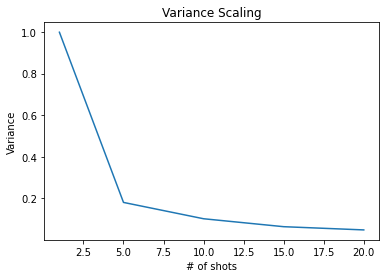

NameError: name 'plotter' is not defined

In [43]:
#I.10.4
def variance_experiment(n_shots):
    """Run an experiment to determine the variance in an expectation
    value computed with a given number of shots.
    
    Args:
        n_shots (int): The number of shots
        
    Returns:
        float: The variance in expectation value we obtain running the 
        circuit 100 times with n_shots shots each.
    """

    # To obtain a variance, we run the circuit multiple times at each shot value.
    n_trials = 100

    # CREATE A DEVICE WITH GIVEN NUMBER OF SHOTS
    dev = qml.device('default.qubit', wires=1, shots=n_shots)
    
    # DECORATE THE CIRCUIT BELOW TO CREATE A QNODE
    @qml.qnode(dev)
    def circuit():
        qml.Hadamard(wires=0)
        return qml.expval(qml.PauliZ(wires=0))

    # RUN THE QNODE N_TRIALS TIMES AND RETURN THE VARIANCE OF THE RESULTS
    arr = [0] * n_trials
    for i in range(n_trials):
        arr[i] = circuit()
    
    return np.var(arr)


# Find out how variance scales, it looks like 1/n
print(variance_experiment(10000))

x = [1,5,10,15,20]
y = [variance_experiment(1), variance_experiment(5), variance_experiment(10), variance_experiment(15), variance_experiment(20)]
plt.title("Variance Scaling") 
plt.xlabel("# of shots") 
plt.ylabel("Variance") 
plt.plot(x,y) 
plt.show()



def variance_scaling(n_shots):
    estimated_variance = 1 / n_shots
    return estimated_variance

# Various numbers of shots; you can change this
shot_vals = [10, 20, 40, 100, 200, 400, 1000, 2000, 4000]

# Used to plot your results
results_experiment = [variance_experiment(shots) for shots in shot_vals]
results_scaling = [variance_scaling(shots) for shots in shot_vals]
plot = plotter(shot_vals, results_experiment, results_scaling)